# Part 1 - advertising.csv

In [5]:
# libraries
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# dataset
data = genfromtxt('data/advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X-avg) / (maxi-mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [45]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # compute output
            output = xi.dot(thetas)
            
            # compute loss li
            li = (output - yi)*(output - yi) / 2
            
            # compute gradient for loss
            li_gradient = (output - yi)
            
            # compute gradient
            gradient = xi.T.dot(li_gradient)
            
            # update thetas
            thetas = thetas - learning_rate * gradient
            
            # logging
            losses.append(li[0][0])
            thetas_path.append(thetas)
            
    return thetas_path, losses

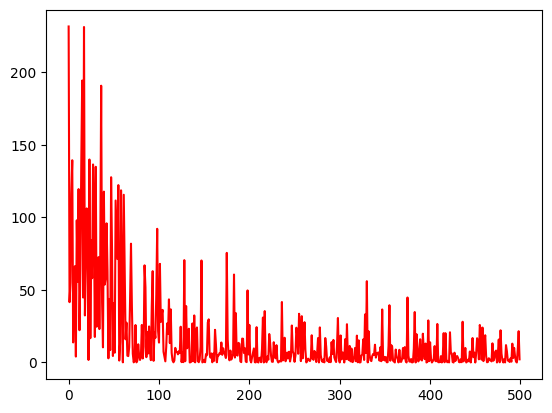

In [46]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [47]:
# question 1
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01 )
print(round(np.sum(losses),2))


6754.64


In [48]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01):

    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application

        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])


        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # tính output
            output = xi.dot(thetas)

            # tính loss
            loss = ((output - yi)**2)/2

            # tính đạo hàm cho loss
            loss_grd = (output - yi)/minibatch_size

            # tính đạo hàm cho các tham số
            gradients = xi.T.dot(loss_grd)

            # cập nhật tham số
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses



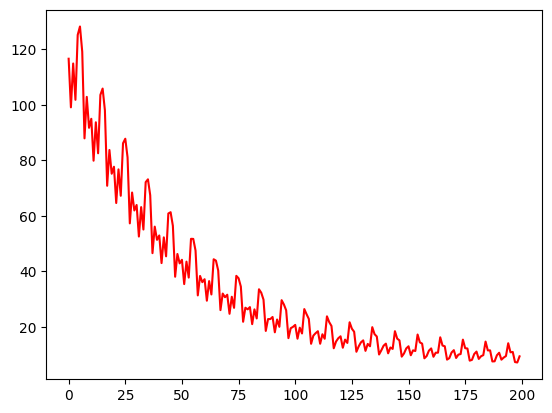

In [50]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

In [51]:
# question 2
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
print(round(sum(losses), 2))

8865.65


In [52]:
def batch_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        # compute output
        y_hat = np.dot(X_b, thetas)
        
        # compute loss
        loss = np.mean((y_hat - y) ** 2)
        
        # compute loss derivative
        error = y_hat - y
        
        # cmpute parameters derivative
        gradient = 2 * np.dot(X_b.T, error) / N
        
        # update parameters
        thetas = thetas - learning_rate * gradient
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss)/N
        losses.append(loss)
        
    return thetas_path, losses

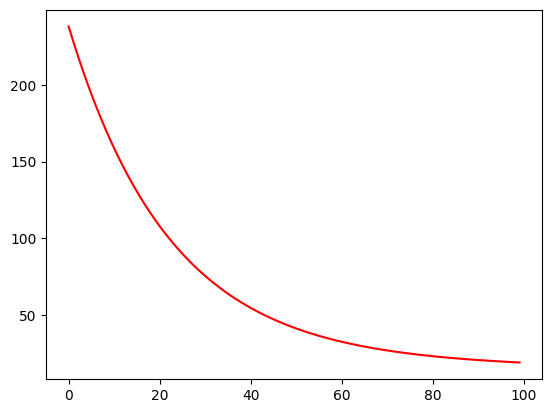

In [53]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()

In [54]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs =100, learning_rate=0.01)
print(round(sum(losses),2))

6716.46


# Part 2 - BTC-Daily.csv

In [55]:
import pandas as pd

df = pd.read_csv('data/BTC-Daily.csv')

df = df.drop_duplicates()

2014-11-28 to 2022-03-01


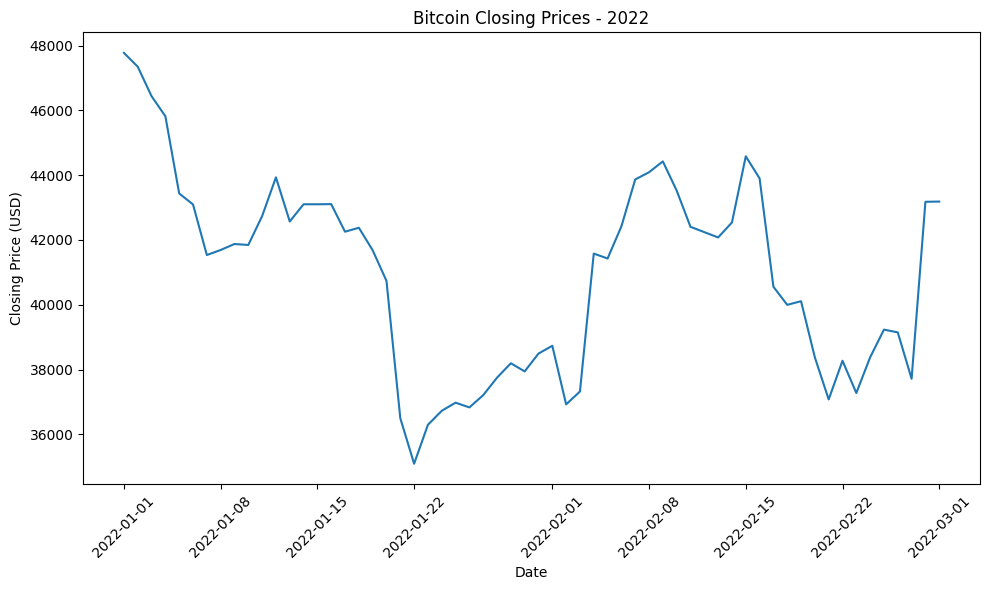

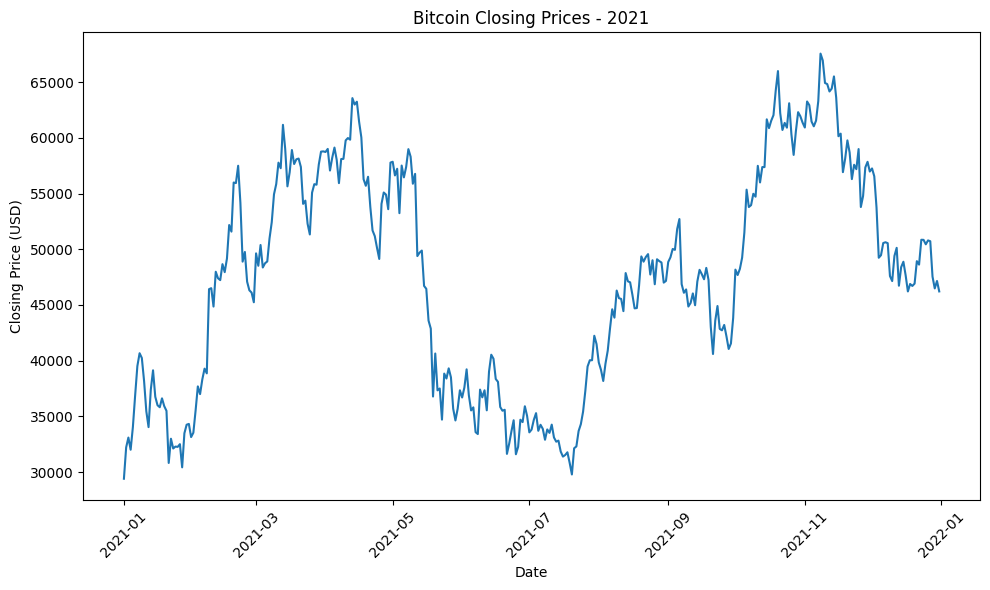

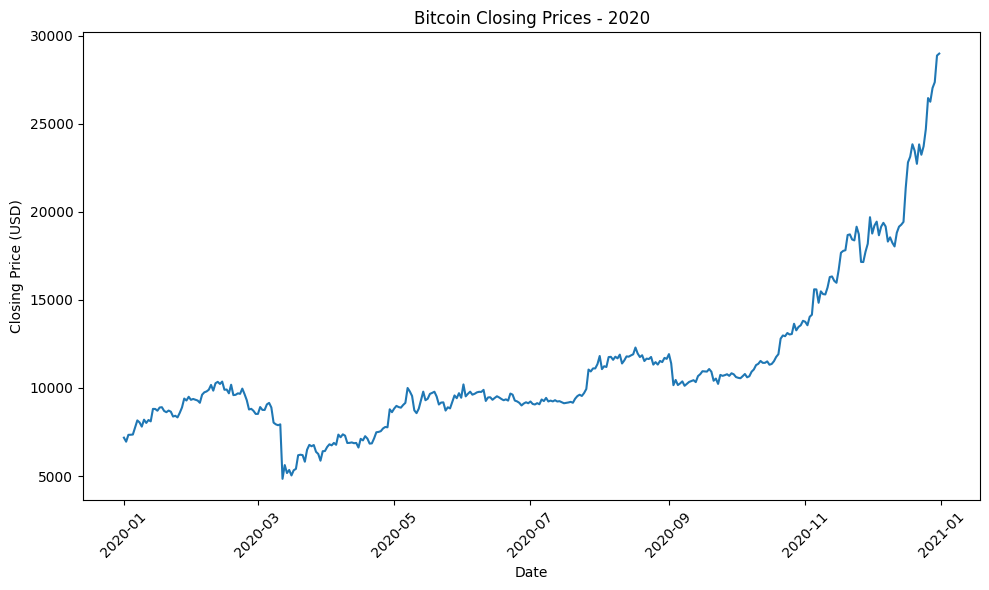

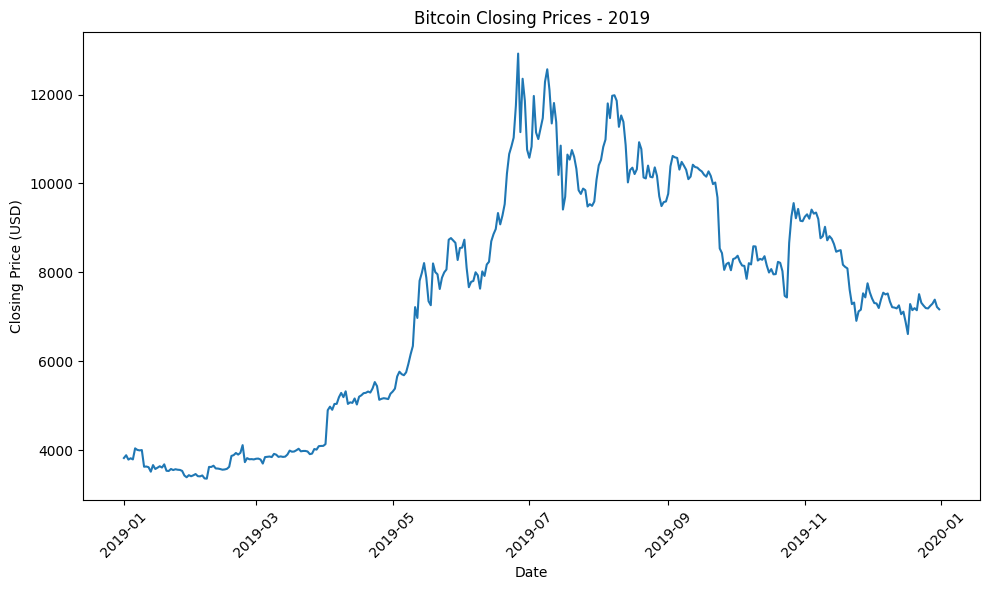

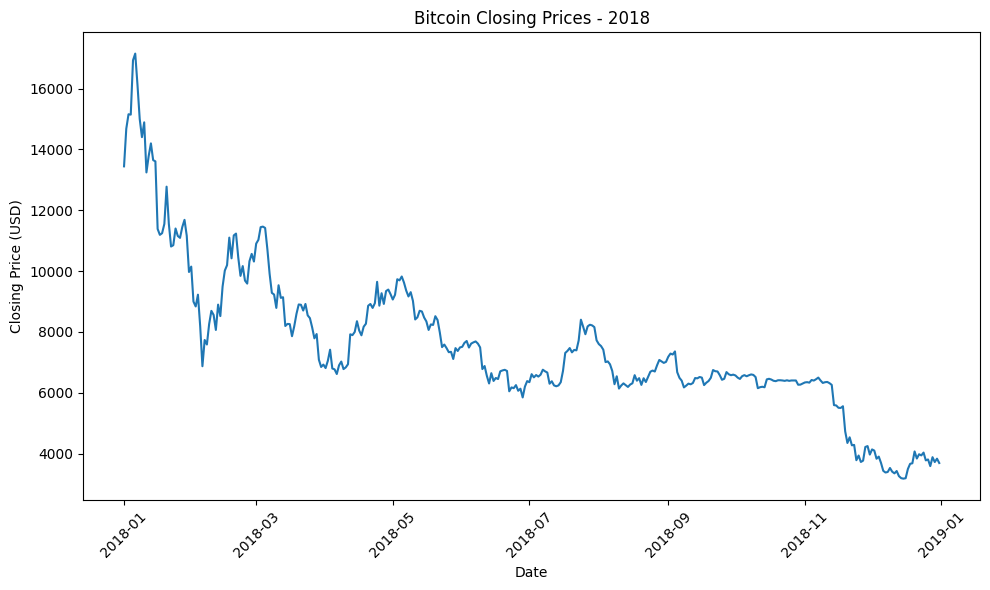

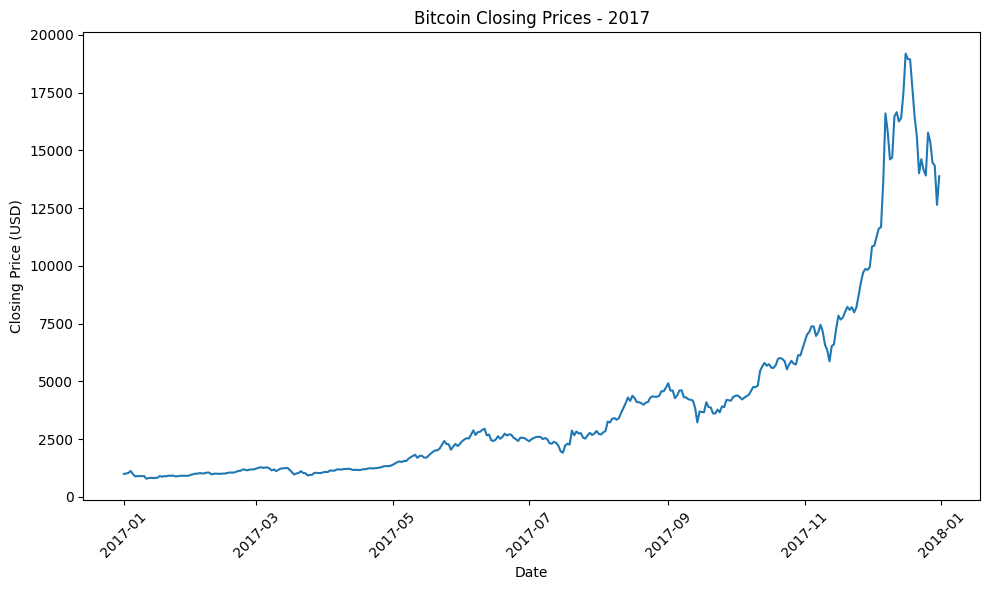

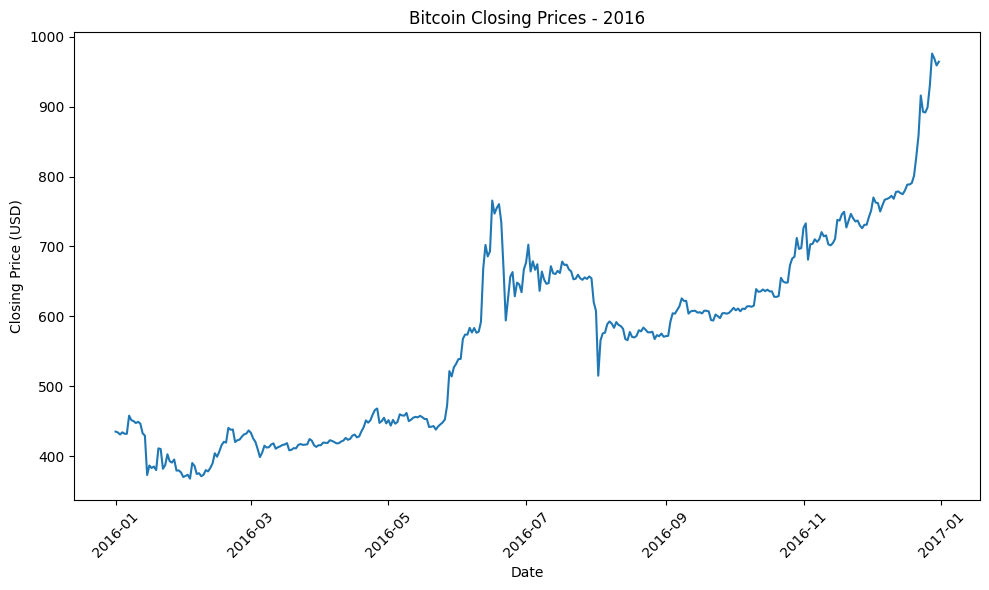

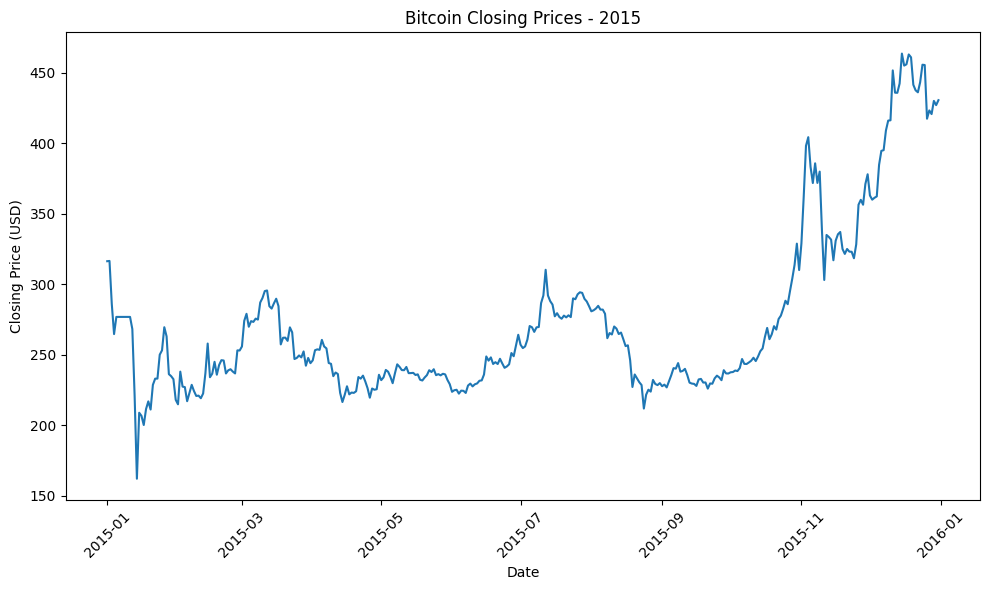

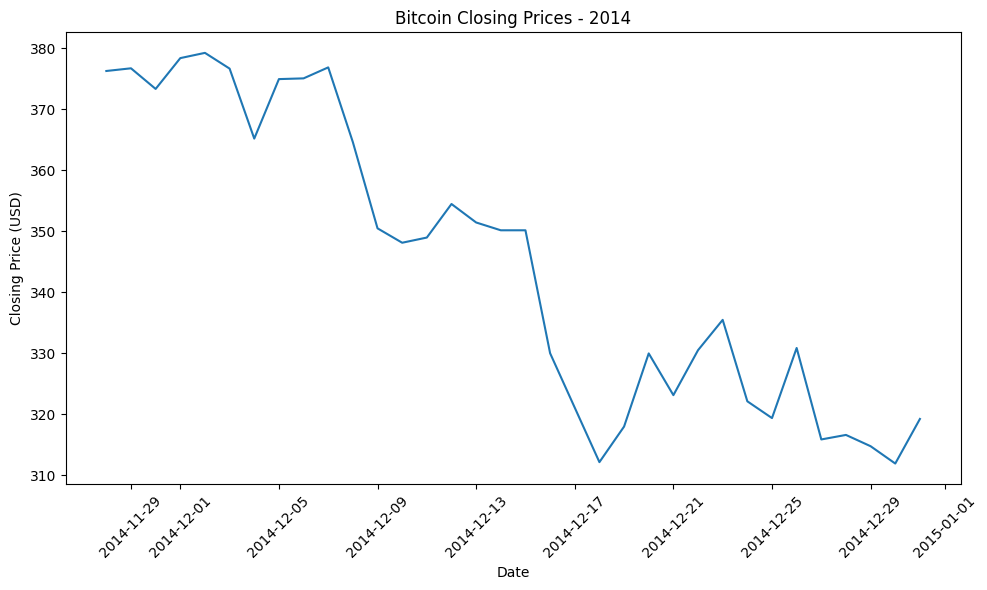

In [58]:
# question 4
# range of data discovered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' +str(df['date'].dt.date.max())
print(date_range)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


unique_years = df['year'].unique()
for year in unique_years:

    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day


    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

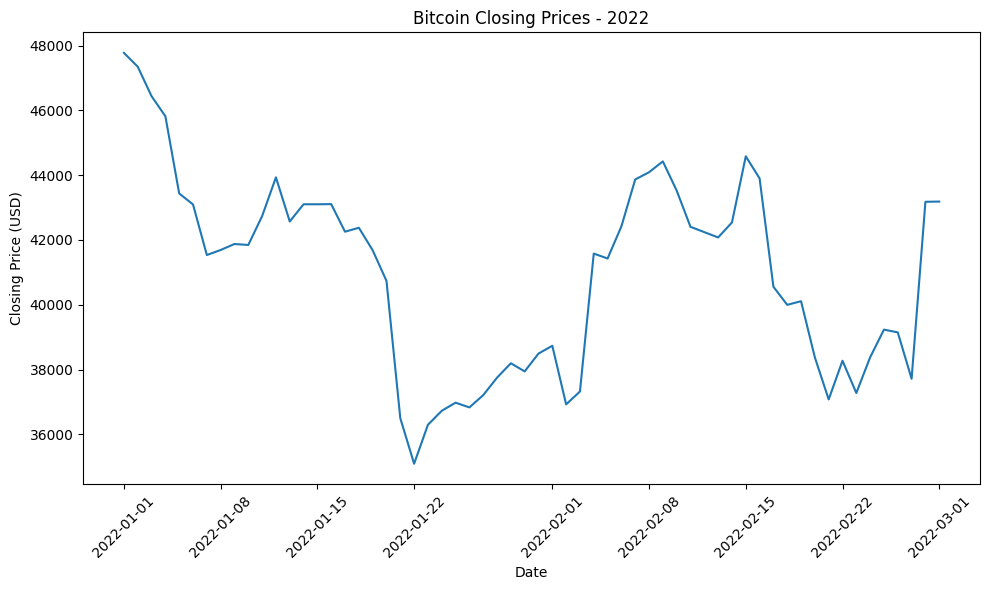

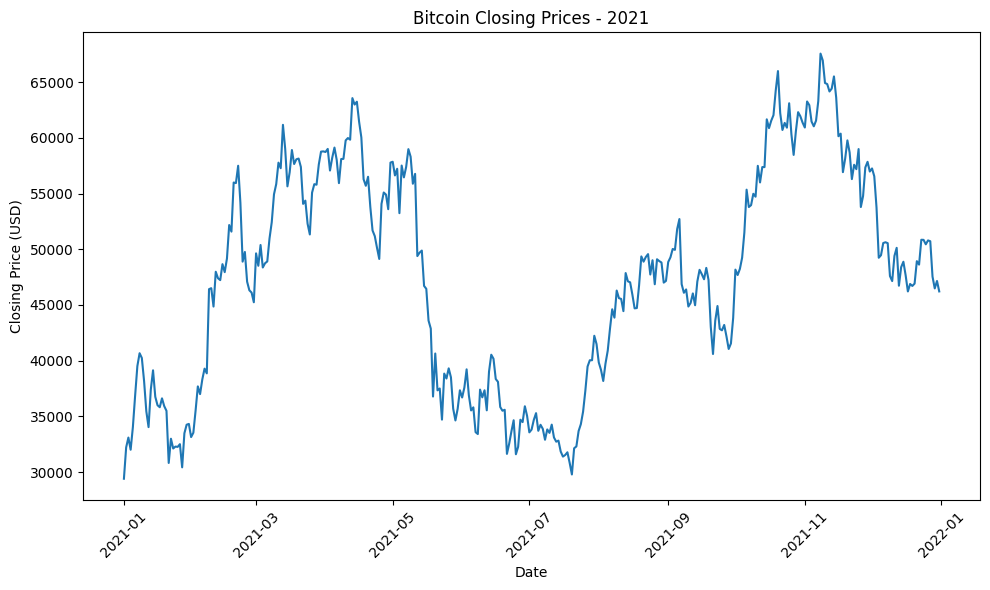

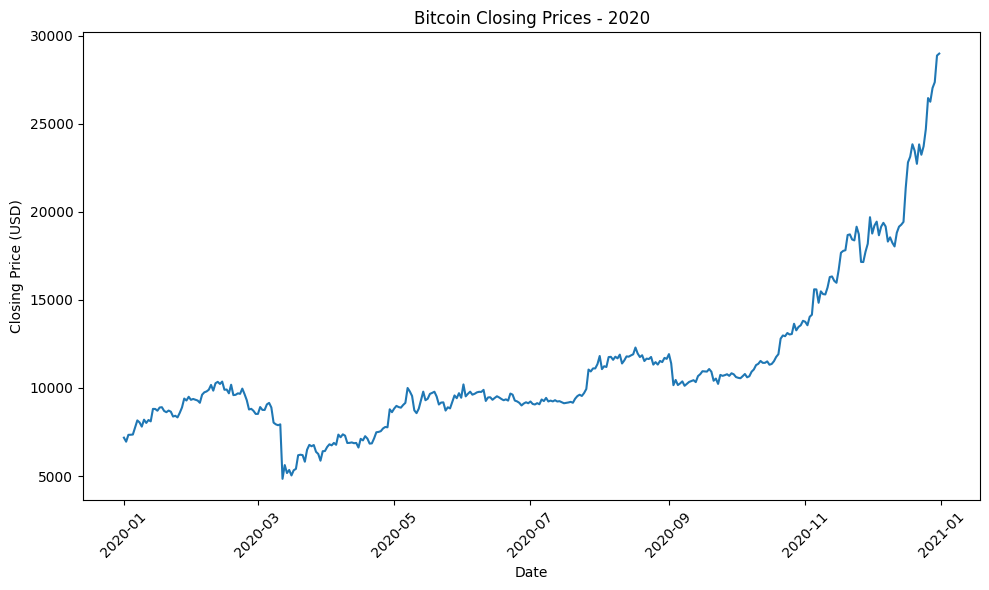

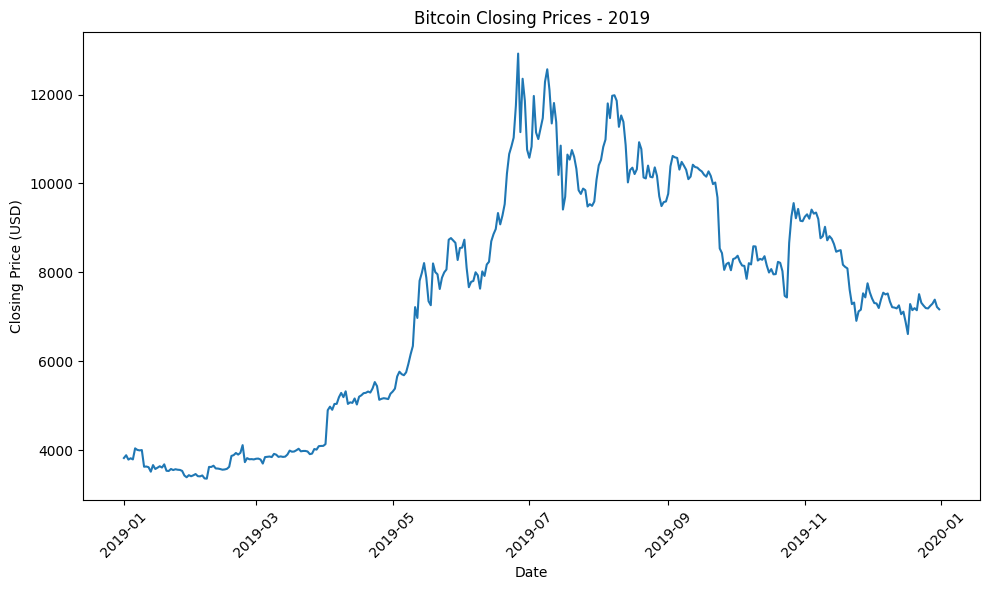

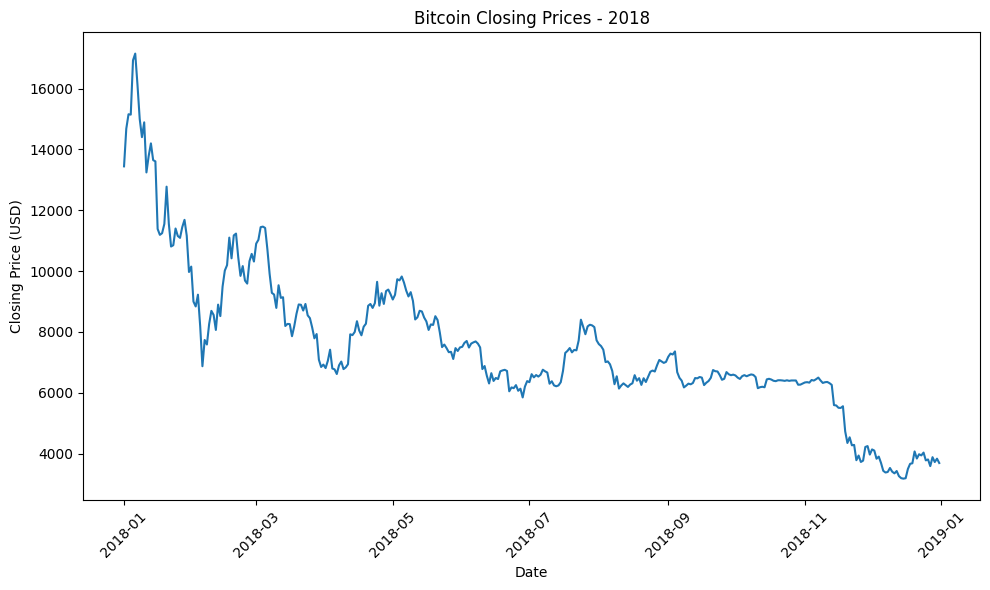

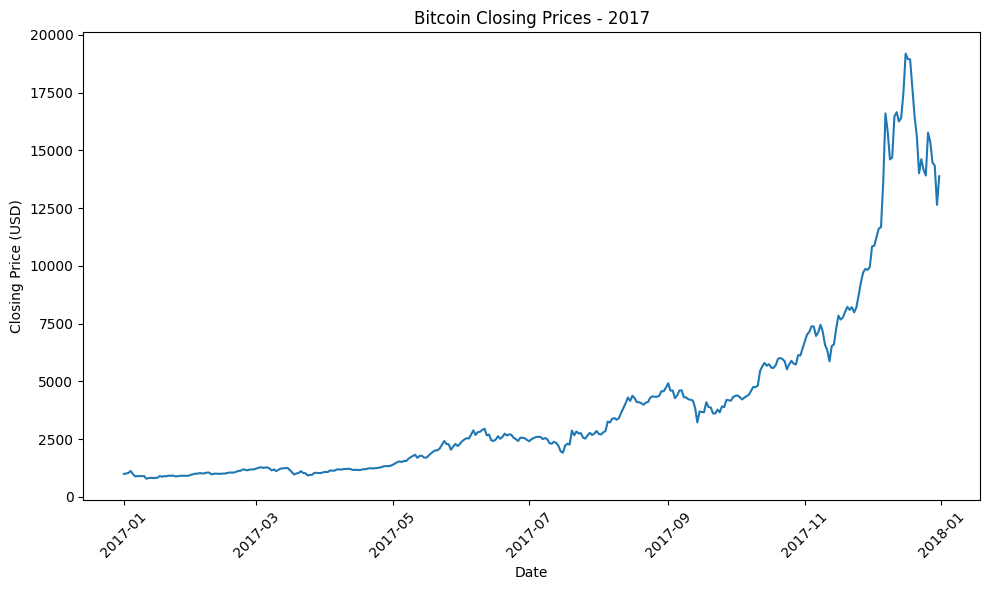

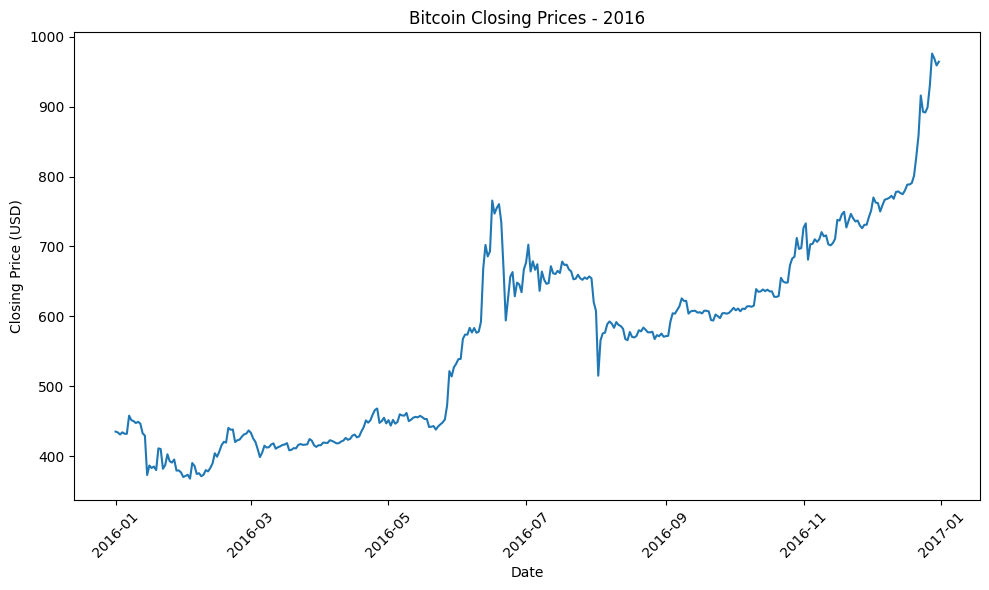

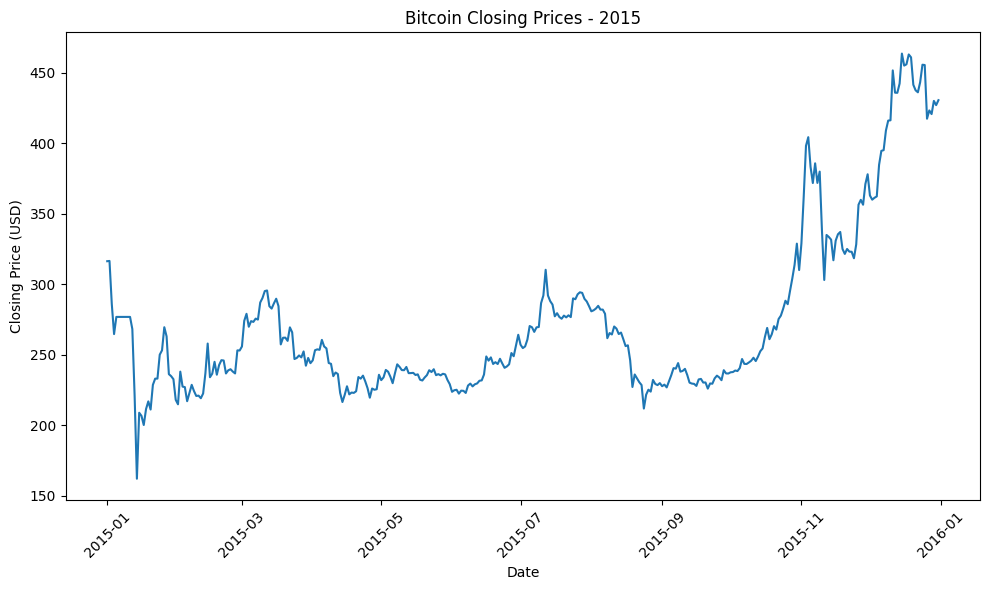

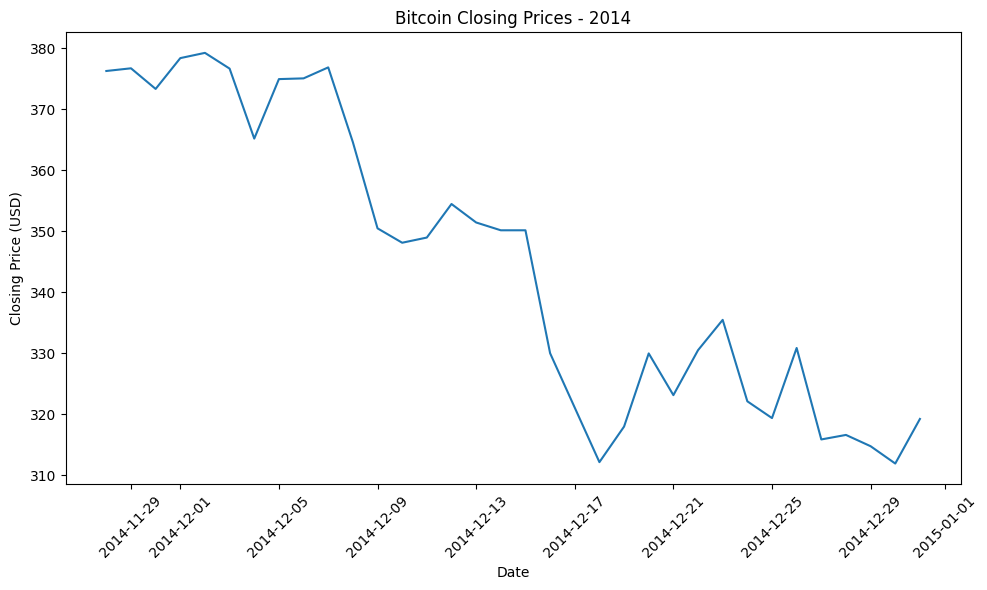

In [ ]:
!pip install mplfinance

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14536\1441779041.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


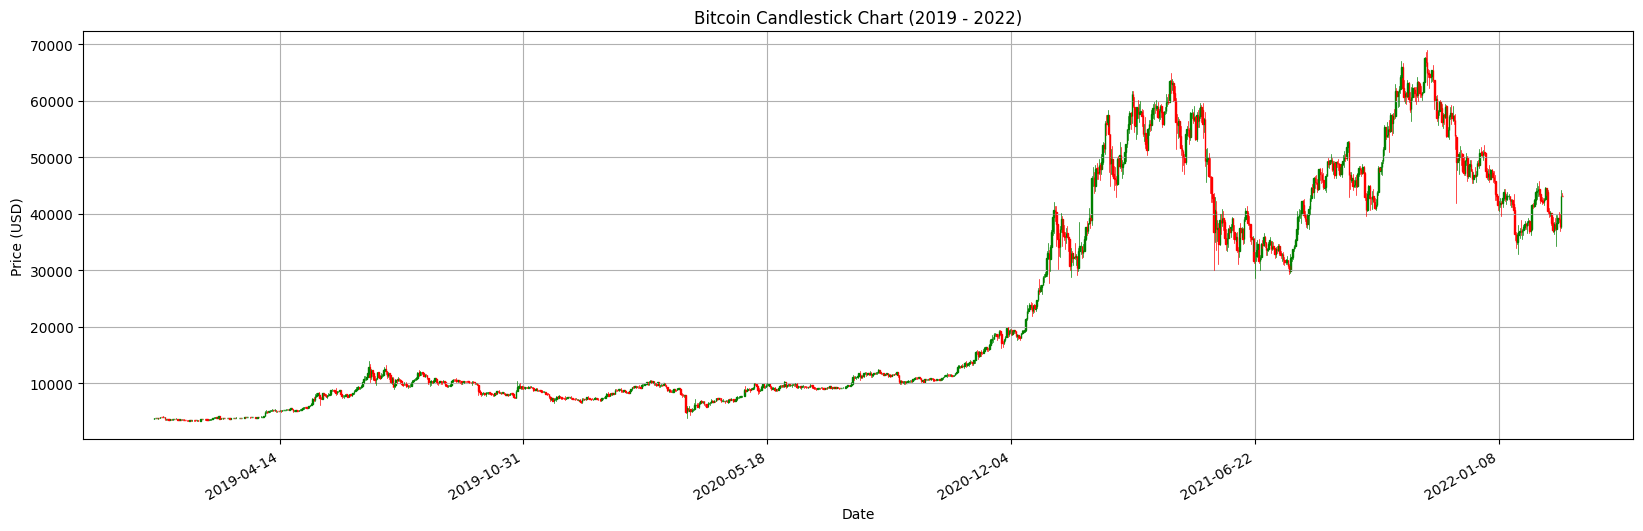

In [67]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# covert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# create candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019 - 2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# save plot as PDF
plt.savefig('bitcoin_candlestick_chart_2019_2022.pdf')

plt.show()

In [98]:
# question 5
def predict(X, w, b):
    return X.dot(w) + b

# question 6
def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss**2) / (2*len(y))
    return (dw, db, cost)

# question 7
def update_weight(w, b, lr, dw, db):
    w_new = w - dw * lr
    b_new = b - db * lr
    return (w_new, b_new)

In [99]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

#Converting Date to numerical form
df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

# Convert the string date to a numerical value
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column if not needed
df.drop(columns=['date_str'], inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae

X = df[["NumericalDate", "Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [100]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0 
    losses = []

    for _ in range(num_iterations):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost)

    return w, b, losses

In [101]:
X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

b = 0
w = np.zeros(X_train.shape[1])
lr = 0.01
epochs = 200

w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, lr, epochs)

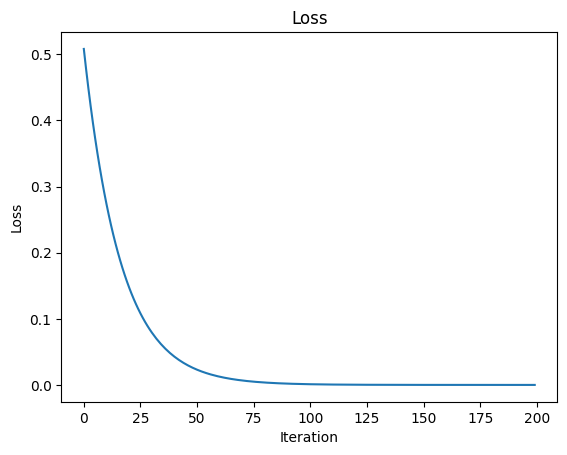

In [102]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [104]:
from sklearn.metrics import r2_score

# make predictions on the test set
y_pred = predict(X_test, w, b)

# calculate rmse
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

# calculate mae
mae = np.mean(np.abs(y_test - y_pred))

# calculate mape
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# calculate r2 on trainig set
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# calculate r2 on test set
test_accuracy = r2_score(y_test, y_pred)

print("RMSE: ", round(rmse, 4))
print("MAE: ", round(mae, 4))
print("Training Accuracy (R2): ", round(train_accuracy, 4))
print("Test Accuracy (R2): ", round(test_accuracy, 4))

RMSE:  0.0293
MAE:  0.0138
Training Accuracy (R2):  0.9989
Test Accuracy (R2):  0.9991


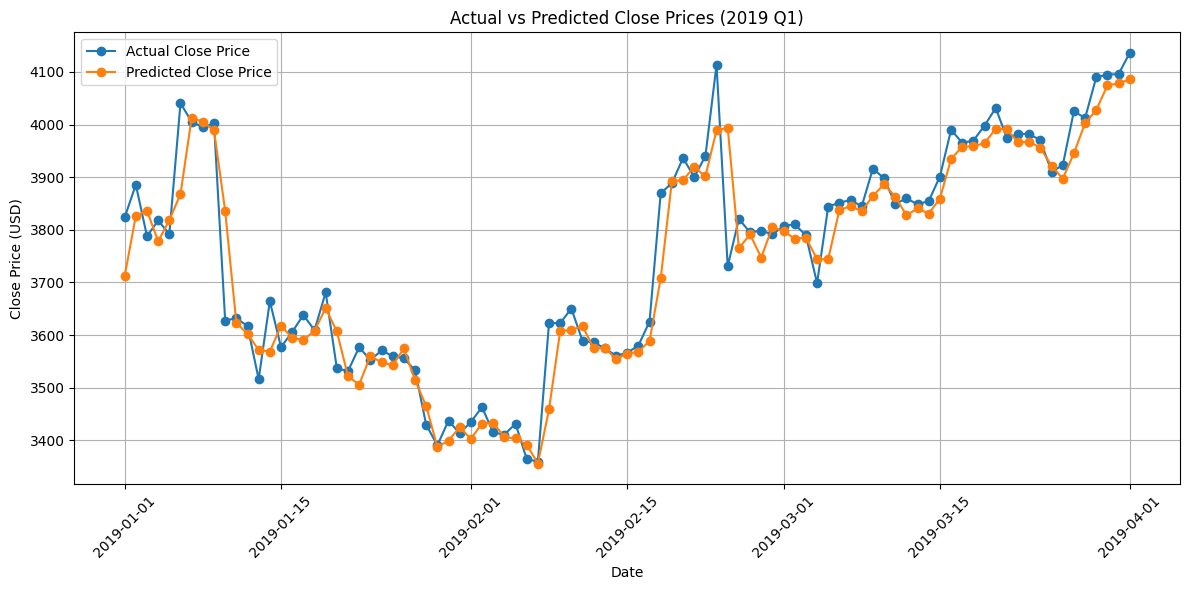

In [105]:
# filter data for 2019-01-01 to 2019-04-01
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# prepare X and y for predictions
X_2019_q1 = df_2019_q1[["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1["close"]

y_2019_q1_pred = predict(X_2019_q1, w, b)

# plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker = 'o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker = 'o')
plt.title('Actual vs Predicted Close Prices (2019 Q1)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()